# Pandas
pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

## Series
The first main data type we will learn about for pandas is the Series data type.

A Series is very similar to a NumPy array (in fact it is built on top of the NumPy array object). What differentiates the NumPy array from a Series, is that a Series can have axis labels, meaning it can be indexed by a label, instead of just a number location. It also doesn't need to hold numeric data, it can hold any arbitrary Python Object.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# if there are no labels, Pandas create series with labels equals indeces
lis1 = [1,2,3]
arr1 = np.array(lis1)
labels = ['a','b','c']
dic = {'x':1,'y':2,'z':3}
print("the list series : \n ",pd.Series(data = lis1))
print("the list series : \n ",pd.Series(data = arr1))
print("the list series with labels : \n ",pd.Series(data = arr1, index= labels))
print("index passed with dic : \n",pd.Series(dic))
ser=pd.Series(dic)
print("accessing index x : ",ser['x'])

the list series : 
  0    1
1    2
2    3
dtype: int64
the list series : 
  0    1
1    2
2    3
dtype: int64
the list series with labels : 
  a    1
b    2
c    3
dtype: int64
index passed with dic : 
 x    1
y    2
z    3
dtype: int64
accessing index x :  1


#### Note : we can make operations on series iff they have the same index

## Data Frames
We can think of a DataFrame as a bunch of Series objects put together to share the same index.

### - selecting

In [3]:
df = pd.DataFrame(data = [[1,2,3],[3,4,5],[2,34,5]],index=['a','b','c'],columns=['x','y','z'])
df

,x,y,z
a,1,2,3
b,3,4,5
c,2,34,5


### - selecting

In [4]:
df['x']                 # selecting a column
df[['x','y']]           # incase of selecting more than one columns input must be a list


,x,y
a,1,2
b,3,4
c,2,34


### - adding and removing 

In [5]:
df['x + y'] = df['x'] + df['y']    
df

,x,y,z,x + y
a,1,2,3,3
b,3,4,5,7
c,2,34,5,36


In [6]:
df = df.drop('x + y',axis=1)
df

,x,y,z
a,1,2,3
b,3,4,5
c,2,34,5


### - selecting raws

In [7]:
df.loc['a']                     # selecting by label
df.iloc[0]                      # selecting by index
df.loc[['a','b']]               # selecting more than raw
df.loc[['a','b'],['x','z']]     # specify the columns with selection
df.iloc[0,0]                    # specify the columns with selection

1

### - creating Data frames out of arrays

* adding lists vertically

In [8]:
list1 = [1, "Boris Yeltsin"]
list2 = [2, "Mikhail Gorbachev"]
frame = pd.DataFrame(
    {
        "column1": list1,
        "column2": list2
    }
)
frame

,column1,column2
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


* adding the lists horizontally

In [9]:
pd.DataFrame(
    [
        list1,
        list2
    ],
    columns=["column1", "column2"]
)

,column1,column2
0,1,Boris Yeltsin
1,2,Mikhail Gorbachev


## Conditional Selection

In [10]:
# like numpy 
df[df>0]                        # entire dataframe columns and raws
df[df['x']>2]                   # entire dataframe with condtions on one columns
df[(df['x']>2) & (df['x']>2)]   # multiple conditions

,x,y,z
b,3,4,5


In [11]:
df[df['x']>1]['z']              # specify the raw with condtions on one columns
df[df['x']>1][['z','y']]        # specify mupltiple raw with condtions on one columns  

,z,y
b,5,4
c,5,34


## MorAbout Index

In [12]:
new_ind = ['alpha','beta','gamma']
df['new index'] = new_ind              # note we can insert list or array without any loops
df.set_index('new index',inplace=True)              # set the columns as the index
df

,x,y,z
new index,,,
alpha,1,2,3
beta,3,4,5
gamma,2,34,5


In [13]:
df.reset_index()                # reset the defualt index [0,1,2,....]

,new index,x,y,z
0,alpha,1,2,3
1,beta,3,4,5
2,gamma,2,34,5


## Missing Data
ways to deal with nan data


In [14]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,5]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,5


In [15]:
df.dropna()                  # delete every raws have nan type
df.dropna(axis=1)            # delete every columns have nan type

,C
0,1
1,2
2,5


In [16]:
df['A'].fillna(value=df['A'].mean())    # filling the place of the missing data by the value of mean of its column    
df['B'].fillna(value=df['B'].mean())
df['C'].fillna(value=df['C'].mean())

0    1
1    2
2    5
Name: C, dtype: int64

## Group By
Now you can use the .groupby() method to group rows together based off of a column name.
#### note : we can not use groupby method without applying a specific method with it 

In [17]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}
df = pd.DataFrame(data)

In [18]:
df.groupby('Company').max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,200
MSFT,Vanessa,340


## Operations

In [19]:
df = pd.DataFrame({'col1':[1,2,3,4],'col2':[444,555,666,444],'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


### - Measuring repeations

In [20]:
df['col2'].value_counts()

444    2
555    1
666    1
Name: col2, dtype: int64

### - Applying Functions

In [21]:
def square(x) : 
    return x**2
df['col1'].apply(square)              # applying function to dataframe

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

### - Soring data

In [22]:
df.sort_values(by='col2') # sorting data accorging to col2

,col1,col2,col3
0,1,444,abc
3,4,444,xyz
1,2,555,def
2,3,666,ghi


## input output data

### - input and ouput csv

In [23]:
pd.read_csv('example').tail()        # reading
df.to_csv('my data')                 # writing

### - input and output excel

In [24]:
pd.read_excel('Excel_Sample.xlsx').tail()   # reading
df.to_excel('Excel_Sample.xlsx')     # writing

## Methods

In [25]:
df.mean()           # getting the mean of every column 
df.mean(axis=1)     # getting the mean of every raw 

0    222.5
1    278.5
2    334.5
3    224.0
dtype: float64

In [26]:
df.corr()           # to get the correlation

,col1,col2
col1,1.00000,0.13484
col2,0.13484,1.00000


# Time Series
A time series is a series of data points indexed (or listed or graphed) in time orde

## - Date Index

In [27]:
df = pd.read_csv("EURUSD_15m_BID_01.01.2010-31.12.2016.csv")   
df.head()
df['Time'] = pd.to_datetime(df['Time'])
df.set_index(df['Time'],inplace=True)

df['Time'] = pd.to_datetime(df['Time'])     # convert the column called time to datetime format
df.set_index('Time',inplace=True)                        # set the column 'Time' as the index

In [28]:
df['2010/01/01 00:00']

,Time,Open,High,Low,Close,Volume
Time,,,,,,
2010-01-01,2010-01-01,1.43283,1.43293,1.43224,1.43293,608600007.1


## - Resample
resample() is a time-based groupby, followed by a reduction method on each of its groups. 
rule can be :

    B business day frequency
    C custom business day frequency (experimental)
    D calendar day frequency
    W weekly frequency
    M month end frequency
    SM semi-month end frequency (15th and end of month)
    BM business month end frequency
    CBM custom business month end frequency
    MS month start frequency
    SMS semi-month start frequency (1st and 15th)
    BMS business month start frequency
    CBMS custom business month start frequency
    Q quarter end frequency
    BQ business quarter endfrequency
    QS quarter start frequency
    BQS business quarter start frequency
    A year end frequency
    BA business year end frequency
    AS year start frequency
    BAS business year start frequency
    BH business hour frequency
    H hourly frequency
    T minutely frequency
    S secondly frequency
    L milliseonds
    U microseconds
    N nanoseconds

then you select the grouping method

In [29]:
df.resample('A').mean().head()    # getting the mean of every year in a simple point


,Open,High,Low,Close,Volume
Time,,,,,
2010-12-31,1.326995,1.327535,1.326413,1.326996,6.583158e+08
2011-12-31,1.392384,1.392884,1.391888,1.392384,1.690308e+09
2012-12-31,1.285991,1.286324,1.285661,1.285992,1.515558e+09
2013-12-31,1.327970,1.328267,1.327676,1.327972,1.468350e+09
2014-12-31,1.328813,1.329035,1.328591,1.328808,1.261119e+09


# Pandas built-in Visualization

In [30]:
# importing
import numpy as np
import pandas as pd
%matplotlib inline

In [31]:
df1 = pd.read_csv('df1')
df2 = pd.read_csv('df2')

## - Histogram

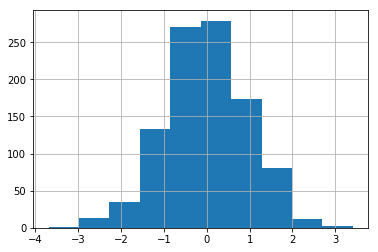

In [32]:
df1['A'].hist()

## - Area

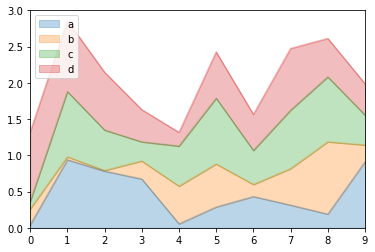

In [33]:
df2.plot.area(alpha=0.3)    # alpha  : presents the transparabcy

## - Bar

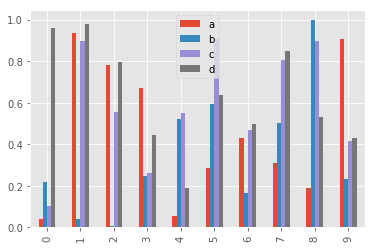

In [34]:
import matplotlib.pylab as plt
plt.style.use('ggplot')
df2.plot.bar()

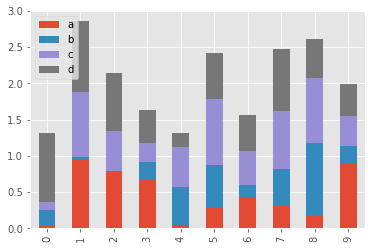

In [35]:
df2.plot.bar(stacked=True)   # in the same level

## - Line

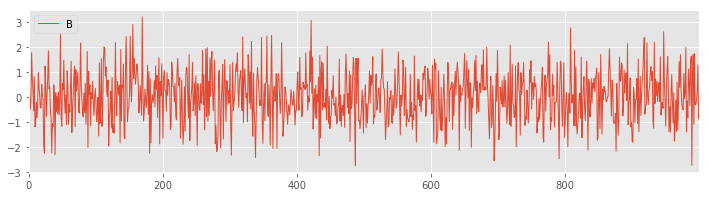

In [36]:
df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

# - scatter

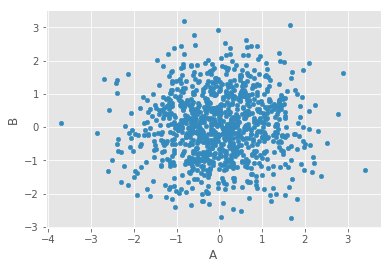

In [37]:
df1.plot.scatter(x='A',y='B')

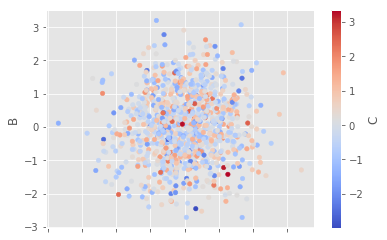

In [38]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')   # based on the value of another column

## - Density kde

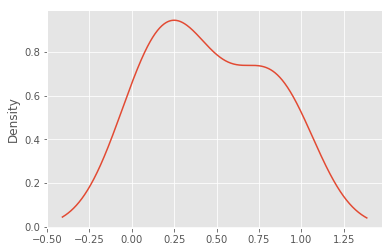

In [39]:
df2['a'].plot.kde()

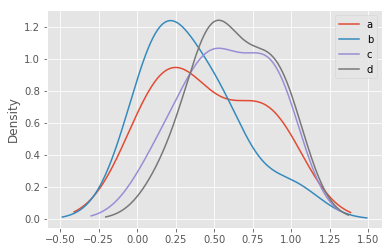

In [40]:
df2.plot.density()